In [ ]:
# %pip install geopandas pandas folium requests matplotlib

take care of the imports

In [3]:
import geopandas as gpd
import requests

Download the shapefiles from the US Census

In [4]:
# load all of the counties as a zip file
file_location = "https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_county_20m.zip"
file_name = "data/cb_2022_us_county_20m/cb_2022_us_county_20m.shp"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(file_location, headers=headers)
with open("cb_2022_us_county_20m.zip", "wb") as f:
    f.write(response.content)


In [5]:

counties = gpd.read_file(file_name)


Get a list of all state names and their codes

In [6]:
# find state codes
state_code_list = counties[['STATEFP', 'STATE_NAME']].drop_duplicates().sort_values('STATE_NAME')
state_code_list = state_code_list.rename(columns={'STATEFP': 'State Code', 'STATE_NAME': 'State Name'})

print(state_code_list.to_string(index=False, justify='right'))

State Code           State Name
        01              Alabama
        02               Alaska
        04              Arizona
        05             Arkansas
        06           California
        08             Colorado
        09          Connecticut
        10             Delaware
        11 District of Columbia
        12              Florida
        13              Georgia
        15               Hawaii
        16                Idaho
        17             Illinois
        18              Indiana
        19                 Iowa
        20               Kansas
        21             Kentucky
        22            Louisiana
        23                Maine
        24             Maryland
        25        Massachusetts
        26             Michigan
        27            Minnesota
        28          Mississippi
        29             Missouri
        30              Montana
        31             Nebraska
        32               Nevada
        33        New Hampshire
        

In [7]:
print(counties)

     STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID       NAME  \
0         17      127  01784730  0500000US17127  17127     Massac   
1         27      017  00659454  0500000US27017  27017    Carlton   
2         37      181  01008591  0500000US37181  37181      Vance   
3         47      079  01639755  0500000US47079  47079      Henry   
4         06      021  00277275  0500000US06021  06021      Glenn   
...      ...      ...       ...             ...    ...        ...   
3217      51      167  01497573  0500000US51167  51167    Russell   
3218      40      089  01101835  0500000US40089  40089  McCurtain   
3219      01      105  00161579  0500000US01105  01105      Perry   
3220      54      043  01550028  0500000US54043  54043    Lincoln   
3221      17      125  00424261  0500000US17125  17125      Mason   

              NAMELSAD STUSPS      STATE_NAME LSAD       ALAND     AWATER  \
0        Massac County     IL        Illinois   06   614218330   12784614   
1       Carlton C

Select your state of interest

In [8]:
# Filter counties for Washington state and display their names
washington_counties = counties[counties['STATE_NAME'] == 'Washington']
print("Counties in Washington:")
print(washington_counties['NAME'].tolist())

Counties in Washington:
['Spokane', 'Mason', 'Pend Oreille', 'Adams', 'Lincoln', 'Cowlitz', 'Whatcom', 'Thurston', 'Snohomish', 'Clark', 'Garfield', 'Klickitat', 'Columbia', 'Walla Walla', 'San Juan', 'Kittitas', 'King', 'Stevens', 'Jefferson', 'Franklin', 'Pierce', 'Okanogan', 'Benton', 'Kitsap', 'Clallam', 'Whitman', 'Island', 'Skamania', 'Grays Harbor', 'Pacific', 'Asotin', 'Wahkiakum', 'Douglas', 'Grant', 'Yakima', 'Ferry', 'Skagit', 'Lewis', 'Chelan']


<Axes: >

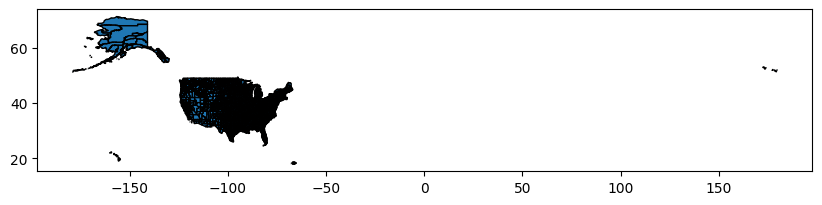

In [9]:
# plot the counties
counties.plot(edgecolor='black', figsize=(10,6))
